In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

#Load data
iris = np.genfromtxt(r'E:\AIO\PyTorch\Data\iris_2D_3c.csv', 
                     dtype=None, 
                     delimiter=',',
                     skip_header=1)
X = torch.tensor(iris[:, 0:2], dtype=torch.float32)
y = torch.tensor(iris[:, 2], dtype=torch.int64)

#Define the model
input_dim = X.shape[1]
output_dim = len(torch.unique(y))
model = nn.Linear(input_dim, output_dim)

#Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),
                      lr=0.1)

#training
max_epoch = 5000
losses = []

for epoch in range(max_epoch):
    #forward pass
    outputs = model(X)

    #compute loss
    loss = loss_fn(outputs, y)
    losses.append(loss.item())

    #Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

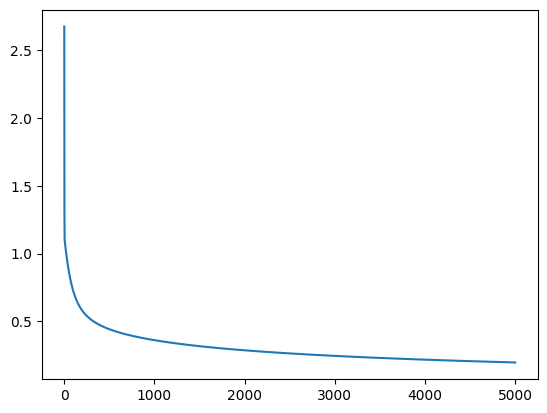

In [2]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [3]:
#compute accuracy for data X
with torch.no_grad():
    outputs = model(X)
    predict = torch.argmax(outputs, 1)
    accuracy = (predict == y).sum().item() / y.size(0)
    print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 100.00%
